<a href="https://colab.research.google.com/github/Chdunham/SUREResearch2021/blob/main/UpdatedNet_Pt8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get Adult data from UCI repository: https://archive.ics.uci.edu/ml/datasets/adult
# >50K, <=50K.
# age: continuous.
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#@title Import Information
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing

tf.__version__

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")


Ran the import statements.


In [ ]:
# Source: https://fairmlbook.org/code/adult.html

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial-Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
        "Hours-per-week", "Country", "Target"] 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# This will download 3.8M
original_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', 
                             engine='python', na_values="?")
# This will download 1.9M
original_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', 
                            engine='python', na_values="?", skiprows=1)

# Drop Na values in train and test sets
original_train = original_train.dropna()
original_test = original_test.dropna()

num_train = len(original_train)
original = pd.concat([original_train, original_test])
roc_original = original
labels = original['Target']
labels = labels.replace('<=50K', 0).replace('>50K', 1)
labels = labels.replace('<=50K.', 0).replace('>50K.', 1)
original

,Age,Workclass,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
Variable_scale = 1600
original = pd.concat([original_test, original_train])
original = original.dropna()

Mask = (original['Sex'] == 'Male') & ((original['Target'] == '<=50K') | (original['Target'] == '<=50K.'))
LessMale = original[Mask]

Mask = (original['Sex'] == 'Male') & ((original['Target'] == '>50K') | (original['Target'] == '>50K.'))
MoreMale = original[Mask]

Mask = (original['Sex'] == 'Female') & ((original['Target'] == '<=50K') | (original['Target'] == '<=50K.'))
LessFemale = original[Mask]

Mask = (original['Sex'] == 'Female') & ((original['Target'] == '>50K') | (original['Target'] == '>50K.'))
MoreFemale = original[Mask]

original = pd.concat([LessMale[:Variable_scale],\
                      MoreMale[:Variable_scale], \
                      LessFemale[:Variable_scale], MoreFemale[:Variable_scale]])
original = original.sample(frac=1)
original

,Age,Workclass,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Target
494,36,State-gov,291676,9th,5,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K.
2736,57,State-gov,170108,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,40,United-States,>50K.
628,49,Self-emp-not-inc,39140,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K.
18189,42,Private,119359,Prof-school,15,Married-civ-spouse,Sales,Wife,Amer-Indian-Eskimo,Female,15024,0,40,South,>50K
2259,24,Private,211968,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,29,Private,188564,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K.
20140,47,Private,198769,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,>50K
1597,20,Private,162282,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,60,United-States,<=50K.
5685,38,Local-gov,156383,Some-college,10,Never-married,Protective-serv,Unmarried,Black,Female,0,0,40,United-States,<=50K.


In [ ]:
#@title Preprocess data into specific values

# Redundant column

original.drop(['Target', 'Education', 'Country'], axis = 1, inplace = True)
original

,Age,Workclass,fnlwgt,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week
494,36,State-gov,291676,5,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40
2736,57,State-gov,170108,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,40
628,49,Self-emp-not-inc,39140,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60
18189,42,Private,119359,15,Married-civ-spouse,Sales,Wife,Amer-Indian-Eskimo,Female,15024,0,40
2259,24,Private,211968,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
2334,29,Private,188564,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45
20140,47,Private,198769,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40
1597,20,Private,162282,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,60
5685,38,Local-gov,156383,10,Never-married,Protective-serv,Unmarried,Black,Female,0,0,40


In [ ]:

#@title Continue to preprocess Data 

def data_transform(df):
    """Normalize features."""
    binary_data = pd.get_dummies(df)
    feature_cols = binary_data[binary_data.columns[:-2]]
    scaler = preprocessing.StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(feature_cols), columns=feature_cols.columns)
    return data

data = data_transform(original)
train_data = data[:num_train]
train_labels = labels[:num_train]
test_data = data[num_train:]
test_labels = labels[num_train:]

train_data

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Martial-Status_Divorced,Martial-Status_Married-AF-spouse,Martial-Status_Married-civ-spouse,Martial-Status_Married-spouse-absent,Martial-Status_Never-married,Martial-Status_Separated,Martial-Status_Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,-0.3,1.0,-2.2,-0.2,-0.3,-0.1,-0.2,-0.3,-1.5,-0.2,-0.3,4.3,-0.0,-0.4,-0.0,1.0,-0.1,-0.6,-0.2,-0.2,-0.4,-0.0,3.1,-0.5,-0.1,-0.2,-0.2,-0.3,-0.1,-0.5,-0.1,-0.4,-0.2,-0.2,1.4,-0.6,-0.2,-0.3,-0.3,-0.5,-0.1,-0.2,3.2,-0.1,-2.6
1,1.3,-0.2,0.9,-0.2,3.8,-0.1,-0.2,-0.3,-1.5,-0.2,-0.3,4.3,-0.0,-0.4,-0.0,1.0,-0.1,-0.6,-0.2,-0.2,-0.4,-0.0,-0.3,2.2,-0.1,-0.2,-0.2,-0.3,-0.1,-0.5,-0.1,-0.4,-0.2,-0.2,1.4,-0.6,-0.2,-0.3,-0.3,-0.5,-0.1,-0.2,-0.3,-0.1,0.4
2,0.7,-1.4,-0.6,-0.2,-0.3,1.6,-0.2,-0.3,-1.5,-0.2,3.4,-0.2,-0.0,-0.4,-0.0,1.0,-0.1,-0.6,-0.2,-0.2,-0.4,-0.0,-0.3,-0.5,6.8,-0.2,-0.2,-0.3,-0.1,-0.5,-0.1,-0.4,-0.2,-0.2,1.4,-0.6,-0.2,-0.3,-0.3,-0.5,-0.1,-0.2,-0.3,-0.1,0.4
3,0.2,-0.7,1.7,1.1,-0.3,-0.1,-0.2,-0.3,0.6,-0.2,-0.3,-0.2,-0.0,-0.4,-0.0,1.0,-0.1,-0.6,-0.2,-0.2,-0.4,-0.0,-0.3,-0.5,-0.1,-0.2,-0.2,-0.3,-0.1,-0.5,-0.1,2.8,-0.2,-0.2,-0.7,-0.6,-0.2,-0.3,-0.3,2.2,9.9,-0.2,-0.3,-0.1,-2.6
4,-1.3,0.3,0.9,-0.2,-0.3,-0.1,-0.2,-0.3,0.6,-0.2,-0.3,-0.2,-0.0,-0.4,-0.0,-1.0,-0.1,1.7,-0.2,-0.2,-0.4,-0.0,-0.3,-0.5,-0.1,-0.2,-0.2,-0.3,-0.1,-0.5,-0.1,-0.4,5.3,-0.2,-0.7,1.8,-0.2,-0.3,-0.3,-0.5,-0.1,-0.2,-0.3,-0.1,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,-0.9,0.0,0.9,-0.2,3.9,0.3,-0.2,-0.3,0.6,-0.2,-0.3,-0.2,-0.0,-0.4,-0.0,1.0,-0.1,-0.6,-0.2,-0.2,-0.4,-0.0,-0.3,-0.5,-0.1,-0.2,-0.2,-0.3,-0.1,2.1,-0.1,-0.4,-0.2,-0.2,1.4,-0.6,-0.2,-0.3,-0.3,-0.5,-0.1,-0.2,-0.3,-0.1,0.4
6396,0.6,0.1,-0.3,-0.2,-0.3,-0.1,-0.2,-0.3,0.6,-0.2,-0.3,-0.2,-0.0,-0.4,-0.0,-1.0,-0.1,1.7,-0.2,-0.2,2.5,-0.0,-0.3,-0.5,-0.1,-0.2,-0.2,-0.3,-0.1,-0.5,-0.1,-0.4,-0.2,-0.2,-0.7,1.8,-0.2,-0.3,-0.3,-0.5,-0.1,-0.2,-0.3,-0.1,0.4
6397,-1.6,-0.2,-0.3,-0.2,-0.3,1.6,-0.2,-0.3,0.6,-0.2,-0.3,-0.2,-0.0,-0.4,-0.0,-1.0,-0.1,1.7,-0.2,-0.2,-0.4,-0.0,-0.3,-0.5,-0.1,-0.2,4.2,-0.3,-0.1,-0.5,-0.1,-0.4,-0.2,-0.2,-0.7,-0.6,-0.2,2.9,-0.3,-0.5,-0.1,-0.2,-0.3,-0.1,0.4
6398,-0.2,-0.3,-0.3,-0.2,-0.3,-0.1,-0.2,3.3,-1.5,-0.2,-0.3,-0.2,-0.0,-0.4,-0.0,-1.0,-0.1,1.7,-0.2,-0.2,-0.4,-0.0,-0.3,-0.5,-0.1,-0.2,-0.2,-0.3,-0.1,-0.5,7.4,-0.4,-0.2,-0.2,-0.7,-0.6,-0.2,-0.3,2.9,-0.5,-0.1,-0.2,3.2,-0.1,-2.6


In [ ]:
# new_df = labels[:num_train]
# temp = new_df.reset_index()
# train_data['Target'] = temp['Target']

# X_train = train_data
# X_train.drop(["Target"], axis=1, inplace=True)

# new_df = labels[num_train:]
# temp = new_df.reset_index()
# test = test_data.reset_index()
# test = test.drop(['index'], axis = 1)
# test_data = test
# test_data['Target'] = temp['Target']

# X_test = test_data
# X_test.drop(["Target"], axis=1, inplace=True)
# X_train

In [ ]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Create a numerical feature column to represent median_income.
'''
temp = tf.feature_column.numeric_column("Sex_Male")
feature_columns.append(temp)

temp = tf.feature_column.numeric_column("Sex_Female")
feature_columns.append(temp)
'''
for x in train_data.columns:
  if x != 'Target':
    temp = tf.feature_column.numeric_column(x)
    feature_columns.append(temp)

print(feature_columns)
# Convert the list of feature columns into a layer that will later be fed into
# the model. 

feature_layer = layers.DenseFeatures(feature_columns)
# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:

feature_layer(dict(train_data))

[NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Education-Num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Capital-Gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Capital-Loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Hours-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Workclass_Federal-gov', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Workclass_Local-gov', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Workclass_Private', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Workclass_Self-emp-inc', s

<tf.Tensor: shape=(6400, 45), dtype=float32, numpy=
array([[-0.31534564, -0.20332228, -0.25003615, ...,  4.32346   ,
        -0.02165571,  1.0359166 ],
       [ 1.3450836 , -0.20332228,  3.7735267 , ...,  4.32346   ,
        -0.02165571, -0.15960819],
       [ 0.7125391 , -0.20332228, -0.25003615, ..., -0.23129623,
        -0.02165571, -1.4475745 ],
       ...,
       [-1.5804346 , -0.20332228, -0.25003615, ..., -0.23129623,
        -0.02165571, -0.23657067],
       [-0.15720953, -0.20332228, -0.25003615, ..., -0.23129623,
        -0.02165571, -0.29458266],
       [-0.3944137 ,  0.45381087, -0.25003615, ..., -0.23129623,
        -0.02165571,  0.54817927]], dtype=float32)>

In [ ]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = Sequential()

  model.add(Dense(100, activation='relu', input_shape=(test_data.shape[1],)))

  model.add(Dense(75, activation='relu'))

  model.add(Dense(50, activation='relu'))

  model.add(Dense(50, activation='relu'))

  model.add(Dense(25, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  #features = {name:np.array(value) for name, value in dataset.items()}
  #label = np.array(features.pop(label_name)) 
  history = model.fit(x=train_data, y=train_labels, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_split=0.1)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [ ]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/50
58/58 [==============================] - 4s 19ms/step - loss: 0.6902 - accuracy: 0.6894 - precision: 0.2640 - recall: 0.1423 - auc: 0.4955 - val_loss: 0.5611 - val_accuracy: 0.7448 - val_precision: 0.2676 - val_recall: 0.0124 - val_auc: 0.5063
Epoch 2/50
58/58 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7483 - precision: 0.2676 - recall: 0.0099 - auc: 0.5115 - val_loss: 0.5634 - val_accuracy: 0.7482 - val_precision: 0.2676 - val_recall: 0.0061 - val_auc: 0.5095
Epoch 3/50
58/58 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7490 - precision: 0.2606 - recall: 0.0054 - auc: 0.5095 - val_loss: 0.5474 - val_accuracy: 0.7489 - val_precision: 0.2436 - val_recall: 0.0040 - val_auc: 0.5107
Epoch 4/50
58/58 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7486 - precision: 0.2436 - recall: 0.0037 - auc: 0.5121 - val_loss: 0.5844 - val_accuracy: 0.7495 - val_precision: 0.2436 - val_recall: 0.0030 -

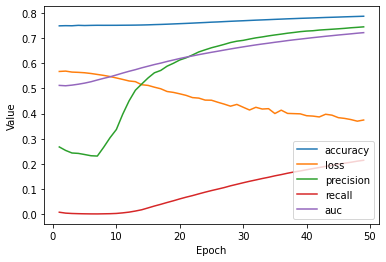

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 1e-2
epochs = 50
batch_size = 100
label_name = "Target"
classification_threshold = 0.50

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
           tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
           tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
           
           tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_data, epochs, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', 'loss', 'precision', 'recall', 'auc'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)